In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# Sparse Hebbian Learning: testing the tools in the package

This notebook aims at show-casing the different tools implemented in the package.


In [3]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 4, 1

In [4]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

In [5]:
help(shl)

Help on SHL in module shl_scripts.shl_experiments object:

class SHL(builtins.object)
 |  Base class to define SHL experiments:
 |      - initialization
 |      - coding and learning
 |      - visualization
 |      - quantitative analysis
 |  
 |  Methods defined here:
 |  
 |  __init__(self, height=256, width=256, patch_size=(16, 16), datapath='database/', name_database='kodakdb', n_dictionary=576, learning_algorithm='mp', fit_tol=None, do_precision=False, do_mask=True, l0_sparseness=100, l0_sparseness_end=None, one_over_F=True, n_iter=4096, eta={'eta': 0.05, 'beta1': 0}, homeo_method='HAP', homeo_params={'eta_homeo': 0.05, 'alpha_homeo': 0.02}, do_sym=False, max_patches=4096, seed=42, patch_norm=False, batch_size=512, record_each=128, n_image=None, DEBUG_DOWNSCALE=1, verbose=0, data_cache='/tmp/data_cache')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  code(self, data, dico, coding_algorithm='mp', matname=None, fit_tol=None, l0_sparseness=None)
 |  



## loading a database


Extracting data..rocky10.png, Data is of shape : (10, 256) - done in 0.24s.


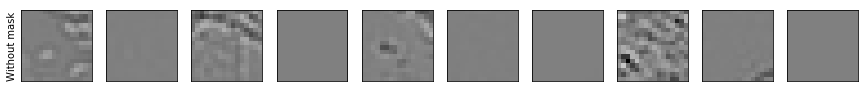

Extracting data..rocky10.png, Data is of shape : (10, 256) - done in 0.15s.


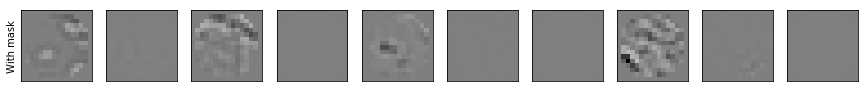

In [6]:
max_patches = 10
from shl_scripts.shl_tools import show_data

for i, (do_mask, label) in enumerate(zip([False, True], ['Without mask', 'With mask'])):
    data = SHL(DEBUG_DOWNSCALE=1, verbose=verbose, max_patches=max_patches, n_image=1, do_mask=do_mask).get_data()
    fig, axs = show_data(data)
    axs[0].set_ylabel(label);
    plt.show();

In [7]:
data = shl.get_data(matname=matname)

Extracting data..loading the data called : /tmp/data_cache/test_tools_data
Data is of shape : (20480, 576) - done in 0.09s.



## initializing the dictionary


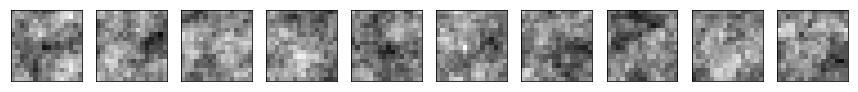

In [8]:
from shl_scripts.shl_learn import ovf_dictionary
data = ovf_dictionary(max_patches, n_pixels=np.prod(shl.patch_size))
fig, axs = show_data(data);


## caching tools : loading a database


In [9]:
matname = 'test_tools'
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)

Let's first remove potential data cache:

In [10]:
!rm data_cache/{matname}*

rm: data_cache/test_tools*: No such file or directory


If the data cache does not exist (as a file), it creates it:

In [11]:
data = shl.get_data(matname=matname)

Extracting data..loading the data called : /tmp/data_cache/test_tools_data
Data is of shape : (20480, 576) - done in 0.10s.


But if the data cache exists, it loads it:

In [12]:
data = shl.get_data(matname=matname)

Extracting data..loading the data called : /tmp/data_cache/test_tools_data
Data is of shape : (20480, 576) - done in 0.11s.



## caching tools : learning, then reloading the dictionary


If the dictionary does not exist (as a file), it learns it:

loading the dico called : /tmp/data_cache/test_tools_dico.pkl


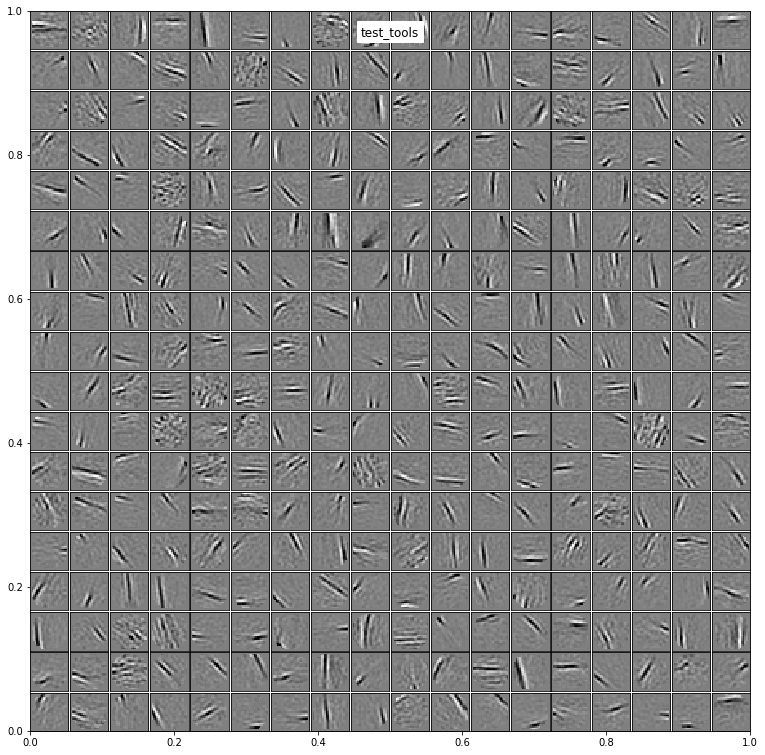

In [13]:
list_figures = ['show_dico']
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

But if the dictionary exists, it loads it:

loading the dico called : /tmp/data_cache/test_tools_dico.pkl


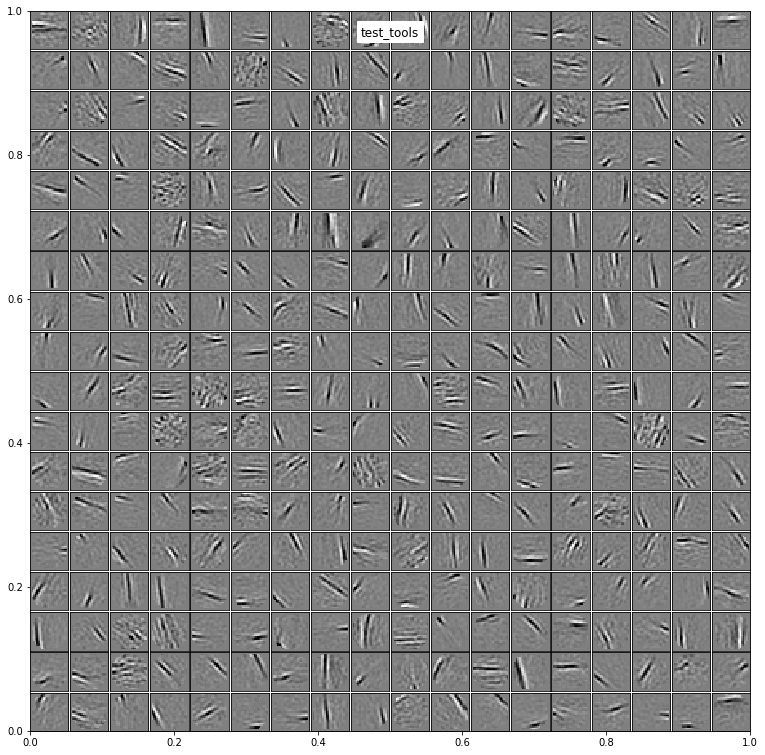

In [14]:
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)


## caching tools : resuming a learning

If we give a dictionary as an argument to the learning method, then we resume the learning from this dictionary and overwrite the data cache.


loading the dico called : /tmp/data_cache/test_tools_dico.pkl
resuming the learning on : /tmp/data_cache/test_tools_dico.pkl


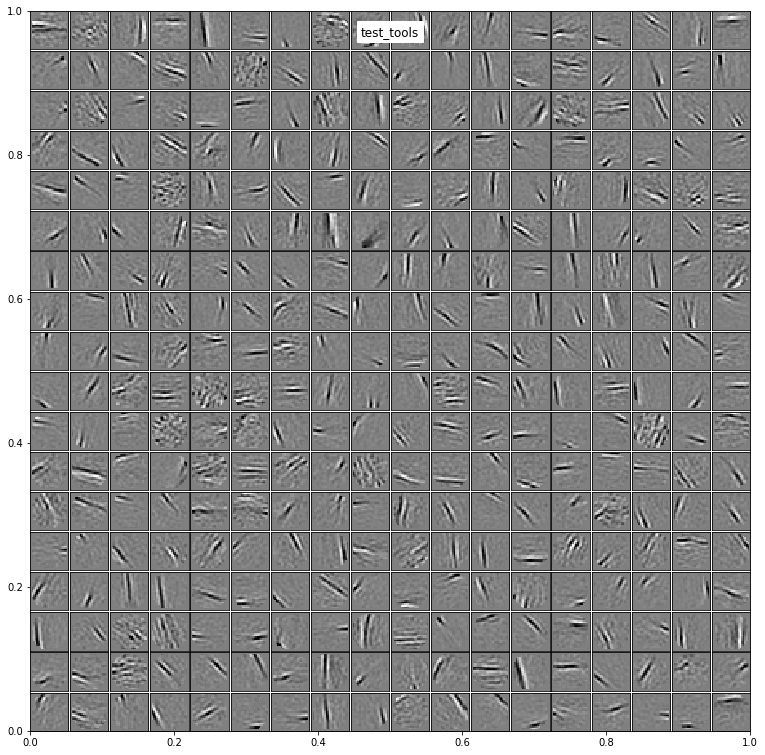

In [15]:
dico = shl.learn_dico(data=data, matname=matname, dictionary=dico.dictionary, list_figures=list_figures)


## caching tools : coding


In [16]:
%%time
sparse_code = shl.code(data, dico)

Coding data with algorithm  mp done in 18.36s.
CPU times: user 12.2 s, sys: 5.85 s, total: 18.1 s
Wall time: 18.4 s


In [17]:
sparse_code = shl.code(data, dico, matname=matname)

loading the code called : /tmp/data_cache/test_tools_coding.npy


## plotting tools

The simplest solution is to pass a list of figures to the learning method:

Extracting data..loading the data called : /tmp/data_cache/test_tools_data
Data is of shape : (20480, 576) - done in 0.06s.
loading the dico called : /tmp/data_cache/test_tools_dico.pkl


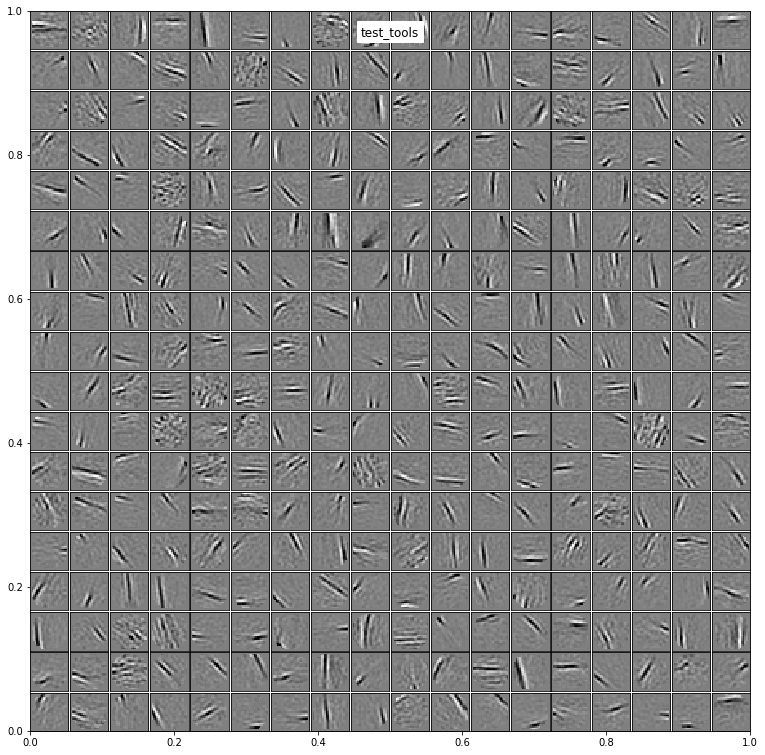

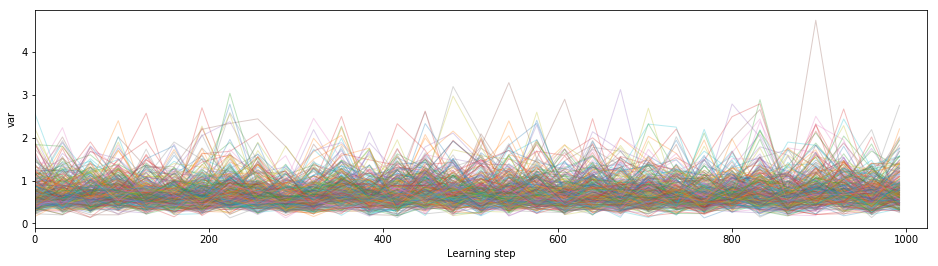

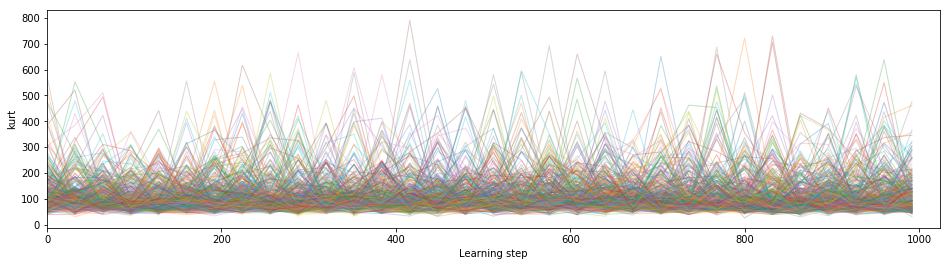

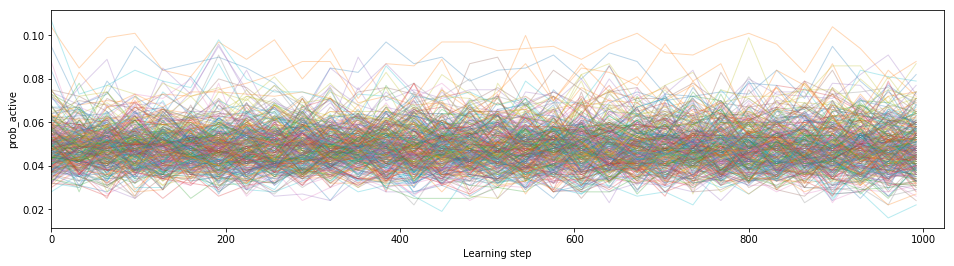

In [18]:
list_figures = ['show_dico',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
dico = shl.learn_dico(matname=matname, list_figures=list_figures)

But one can also generate every single figure independently:

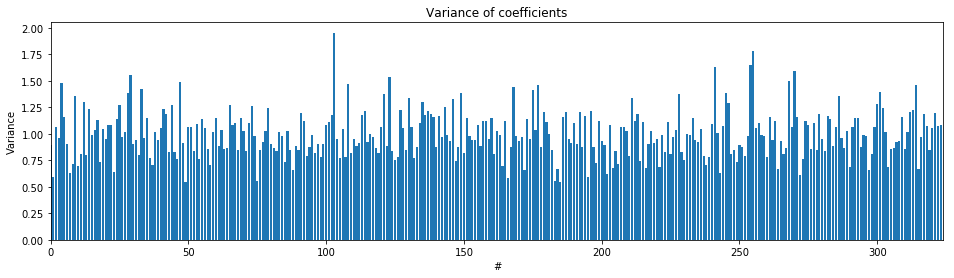

In [19]:
shl.plot_variance(sparse_code);

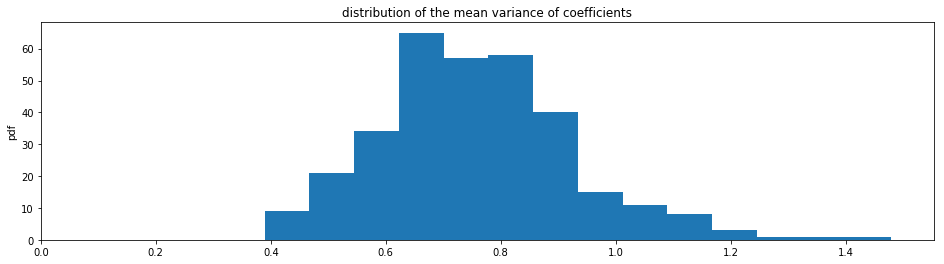

In [20]:
shl.plot_variance_histogram(sparse_code);

Training on 20480 patches... [dict_learning] Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)


ValueError: operands could not be broadcast together with shapes (1,576) (512,324) 

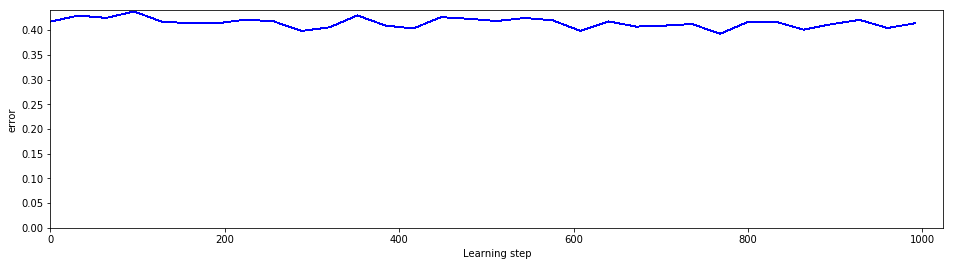

In [21]:
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico, variable='error', fig=fig_error, ax=ax_error, color='blue', label='one');
dico = shl.learn_dico(data=data, dictionary=dico.dictionary, matname=None, list_figures=list_figures)
fig_error, ax_error = shl.time_plot(dico, variable='error', fig=fig_error, ax=ax_error, color='red', label='two');
ax_error.set_ylim(0, .9)
ax_error.legend(loc='best');

And combine them:

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(13, 8))
fig, axs[0] = shl.plot_variance(sparse_code, fig=fig, ax=axs[0])
fig, axs[1] = shl.plot_variance_histogram(sparse_code, fig=fig, ax=axs[1])

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts